# Exploratory data analysis (EDA)

Dig in your data, find stuff

In [2]:
import os
import sys
PROJECT_DIRECTORY = os.path.realpath(os.path.curdir)

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

In [27]:
## Viz and analysis
import math
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30


## Logging

Enable logging and crank up log level to DEBUG. This is particularly useful when developing code in your project module and using it from a notebook.


In [8]:
import logging
from src.log import logger

logger.setLevel(logging.DEBUG)

# Get data

In [18]:
df = pd.read_csv("../data/processed/etl_vestland.csv")
df.municipality_id = df.municipality_id.astype(str)

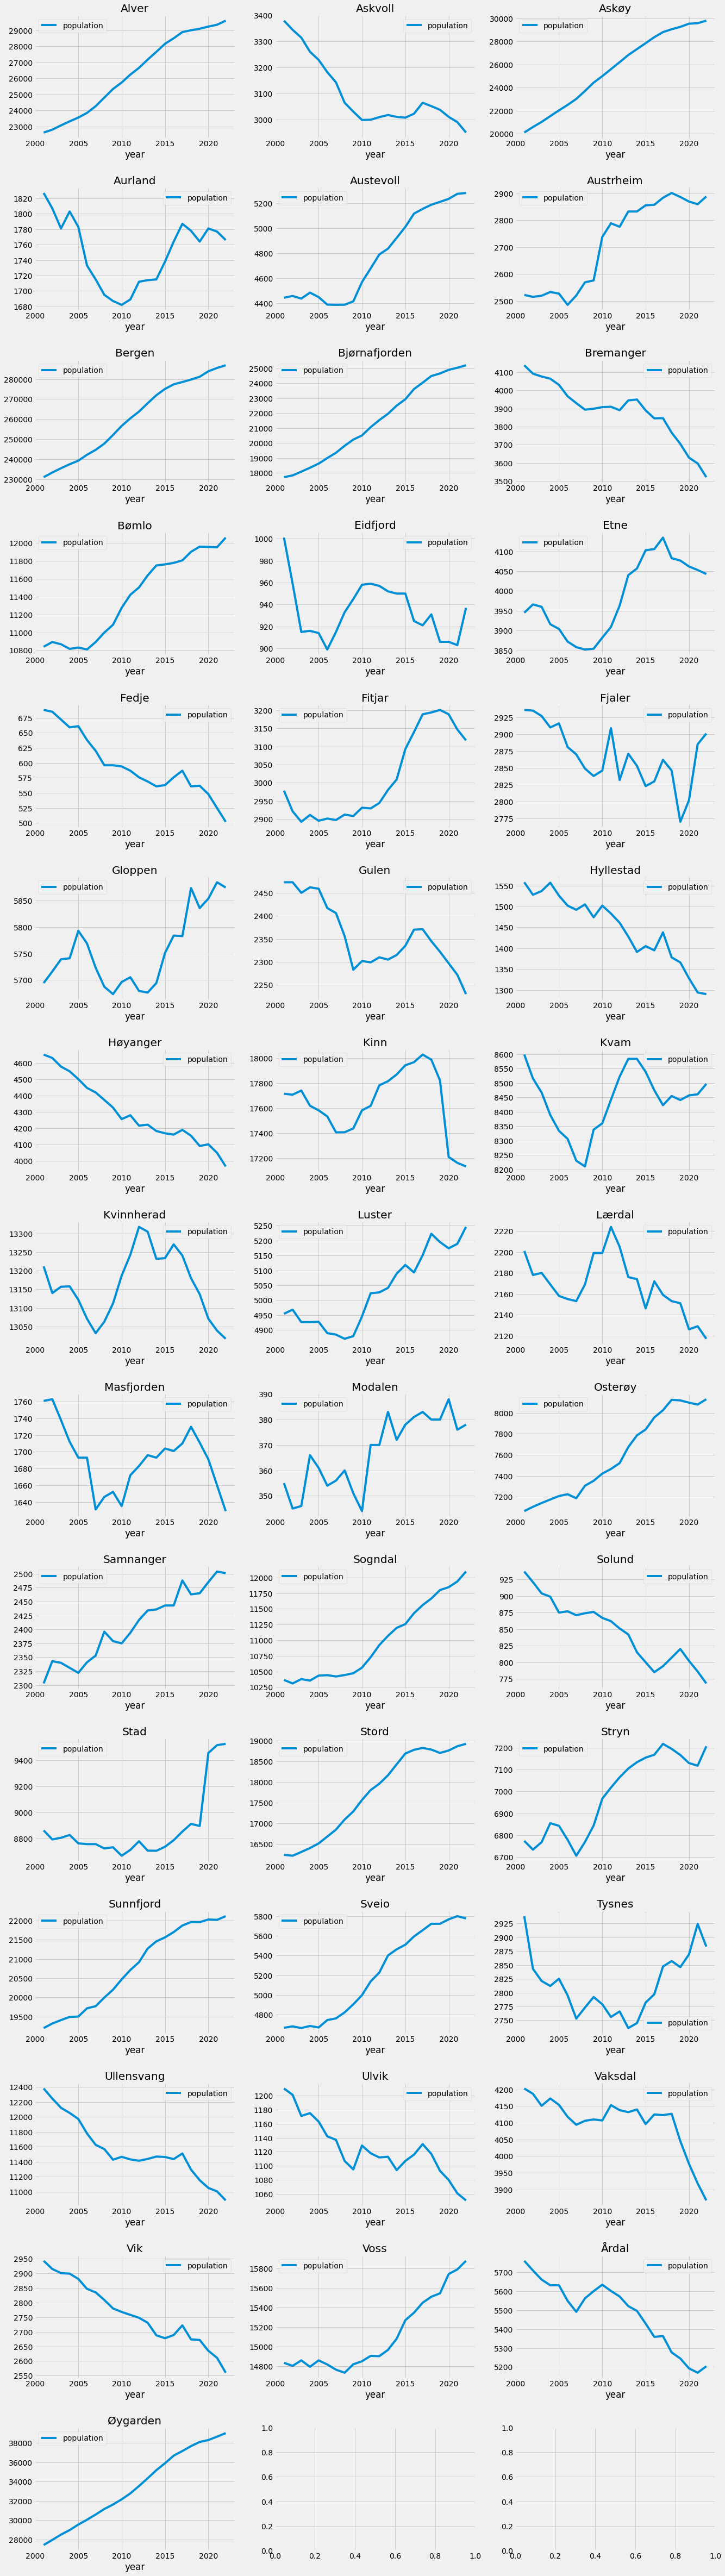

In [52]:
number_of_graphs_each_line = 3
number_of_lines = math.ceil(len(df['municipality_id'].unique()) / 3)

df = df.sort_values(by=["municipality", "year"])

with plt.style.context('fivethirtyeight'):
    fig, axes = plt.subplots(number_of_lines, number_of_graphs_each_line, figsize=(20, 80))
    plt.subplots_adjust(hspace=0.4)

    for i, municipality in enumerate(df['municipality_id'].unique()):
        df_data = df[df.municipality_id == municipality]

        ax = axes[math.floor(i / number_of_graphs_each_line), i % number_of_graphs_each_line]
        ax.set_title('{kommune}'.format(kommune=df_data["municipality"].iloc[0]))
        df_data.plot(ax=ax, x="year", y="population")